# Imports, contants, and functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def trapezoidal(x, a, b, c, d):
    result = np.zeros_like(x)
    if a != b:
        result = np.maximum(result, np.minimum((x - a) / (b - a), 1))
    if c != d:
        result = np.maximum(result, np.minimum((d - x) / (d - c), 1))
    return np.maximum(0, result)

def gaussian(x, c, sigma = 1.7): # As the example in the slides - constant sigma = 1.7 - you can change it from here
    return np.exp(-0.5 * ((x - c) / sigma) ** 2)

def triangular(x, a, b, c):
    return np.maximum(0, np.minimum((x - a) / (b - a), (c - x) / (c - b)))

def plot_membership_functions():
    # Plotting the membership functions
    plt.figure(figsize=(16, 4))

    # Food Quality
    plt.subplot(1, 3, 1)
    plt.plot(x_range_food, rancid, label='Rancid')
    plt.plot(x_range_food, delicious, label='Delicious')
    plt.title('Food Quality Membership Functions')
    plt.ylabel('Degree of membership')
    plt.legend()

    # Service Quality
    plt.subplot(1, 3, 2)
    plt.plot(x_range_service, poor, label='Poor')
    plt.plot(x_range_service, good, label='Good')
    plt.plot(x_range_service, excellent, label='Excellent')
    plt.title('Service Quality Membership Functions')
    plt.ylabel('Degree of membership')
    plt.legend()

    # Tip Amount
    plt.subplot(1, 3, 3)
    plt.plot(x_range_tip, cheap, label='Cheap')
    plt.plot(x_range_tip, average, label='Average')
    plt.plot(x_range_tip, generous, label='Generous')
    plt.title('Tip Amount Membership Functions')
    plt.xlabel('Tip Amount')
    plt.ylabel('Degree of membership')
    plt.legend()

    plt.tight_layout()
    plt.show()
    
def plot_mamdani(x_range, y, tip):
    # Plotting the membership functions
    plt.figure(figsize=(8, 4))

    plt.plot(x_range, y)
    plt.axvline(x=tip, color='green', linestyle='--', linewidth=2)
    plt.text(tip, 0.5, f'tip={tip}', horizontalalignment='right', color='green')
    plt.title('Mamdani')
    plt.xlabel('Tip')
    plt.ylabel('Degree of membership')
    plt.ylim(0, 1)
    plt.xlim(0, 30)
    plt.show()
    
def plot_sugeno(x_values, y_values, tip):
    # Choose an appropriate bar width
    bar_width = 0.1

    # Plotting the membership functions as a bar plot
    plt.figure(figsize=(8, 4))

    plt.bar(x_values, y_values, width=bar_width, align='center')
    plt.axvline(x=tip, color='green', linestyle='--', linewidth=2)
    plt.text(tip, 0.5, f'tip={tip}', horizontalalignment='right', color='green')
    plt.title('Sugeno')
    plt.xlabel('Tip')
    plt.ylabel('Degree of membership')
    plt.ylim(0, 1)
    plt.xlim(0, 30)
    plt.show()

    
def mamdani_inference(food_quality, service_quality):
    # Fuzzification
    food_rancid_degree = round(trapezoidal(food_quality, 0, 0, 3, 6), 2)
    food_delicious_degree = round(trapezoidal(food_quality, 4, 7, 10, 10), 2)
    service_poor_degree = round(gaussian(service_quality, c=0), 2)
    service_good_degree = round(gaussian(service_quality, c=5), 2)
    service_excellent_degree = round(gaussian(service_quality, c=10), 2)
    
    # Rule Evaluation
    tip_cheap_degree = np.maximum(service_poor_degree, food_rancid_degree)
    tip_average_degree = service_good_degree
    tip_generous_degree = np.maximum(service_excellent_degree, food_delicious_degree)

    # Aggregation = we are taking all of the 1000 points for nice accuracy
    min_cheap = np.fmin(tip_cheap_degree, cheap)
    min_average = np.fmin(tip_average_degree, average)
    min_generous = np.fmin(tip_generous_degree, generous)
        
    aggregated_tip = np.fmax(np.fmax(min_cheap, min_average), min_generous)
        
    # Defuzzification
    tip = np.sum(aggregated_tip * x_range_tip) / np.sum(aggregated_tip)
    
    # Plot aggregation and result
    plot_mamdani(x_range_tip, aggregated_tip, tip)
    return tip

def sugeno_inference(food_quality, service_quality):
    # Fuzzification
    food_rancid_degree = trapezoidal(food_quality, 0, 0, 3, 6)
    food_delicious_degree = trapezoidal(food_quality, 4, 7, 10, 10)
    service_poor_degree = gaussian(service_quality, c=0)
    service_good_degree = gaussian(service_quality, c=5)
    service_excellent_degree = gaussian(service_quality, c=10)

    # Rule Evaluation with constants
    tip_cheap = 5
    tip_average = 15
    tip_generous = 25

    # Determine the weights for each rule
    weight_cheap = max(food_rancid_degree, service_poor_degree)  # Max for 'OR' logic
    weight_average = service_good_degree  # Directly use for 'Good' service
    weight_generous = max(food_delicious_degree, service_excellent_degree)  # Max for 'OR' logic

    # Aggregation
    cheap_agg = tip_cheap * weight_cheap
    average_agg = tip_average * weight_average
    generous_agg = tip_generous * weight_generous

    # Calculate final tip (make sure to avoid division by zero)
    total_weight = weight_cheap + weight_average + weight_generous
    tip = (cheap_agg + average_agg + generous_agg) / total_weight if total_weight != 0 else 0
    
    # Plot
    plot_sugeno([tip_cheap, tip_average, tip_generous], [weight_cheap, weight_average, weight_generous], tip)
    return tip


################################## Define MM Functions values ###########################
# Define the range for each variable
x_range_food = np.linspace(0, 10, 1000) # 1000 is number of samples here and below
x_range_service = np.linspace(0, 10, 1000)
x_range_tip = np.linspace(0, 30, 1000)
    
# Food Quality Membership Functions
rancid = trapezoidal(x_range_food, a = 0, b = 0, c = 3, d = 6)
delicious = trapezoidal(x_range_food, a = 4, b = 7, c = 10, d = 10)
    
# Service Quality Membership Functions
poor = gaussian(x_range_service, c = 0)
good = gaussian(x_range_service, c = 5)
excellent = gaussian(x_range_service, c = 10)

# Tip Amount Membership Functions
cheap = triangular(x_range_tip, a = 0, b = 5, c = 10)
average = triangular(x_range_tip, a = 10, b = 15, c = 20)
generous = triangular(x_range_tip, a = 20, b = 25, c = 30)
################################## Define MM Functions values ###########################

# Plotting membership functions

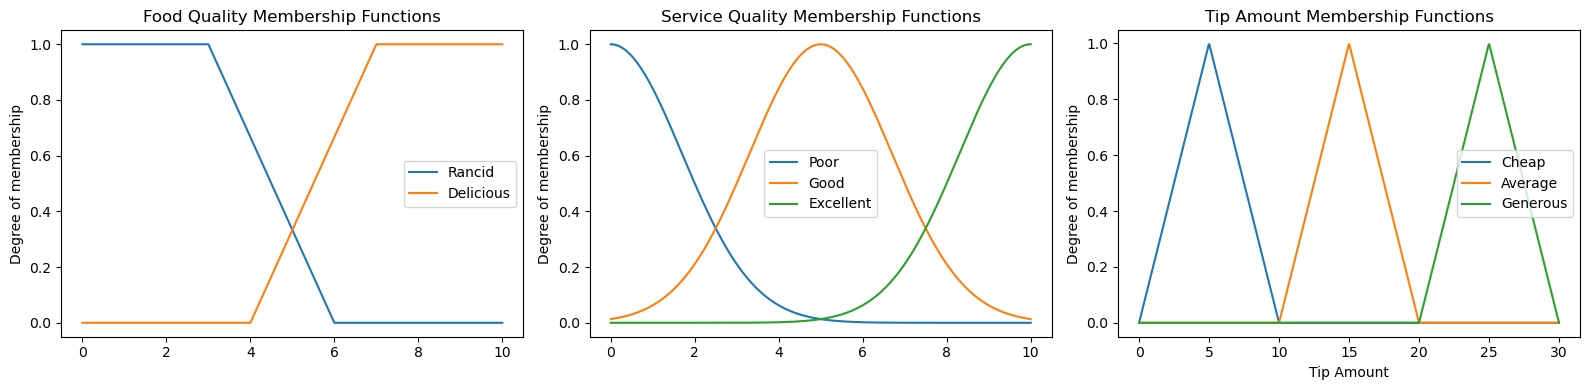

In [2]:
plot_membership_functions()

# Fuzzy inference for a given input for both Sugeno and Mamdani

Enter food quality (0-10):  6
Enter service quality (0-10):  8


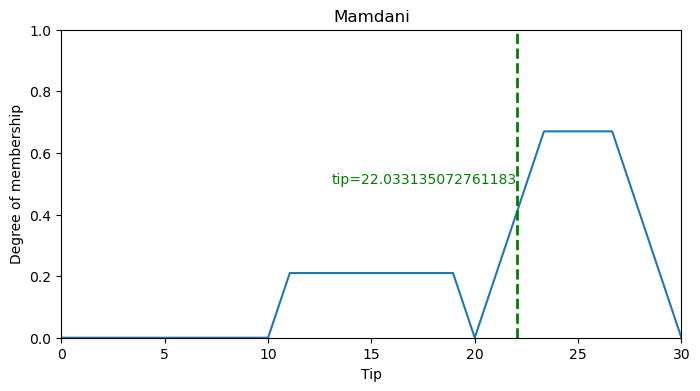

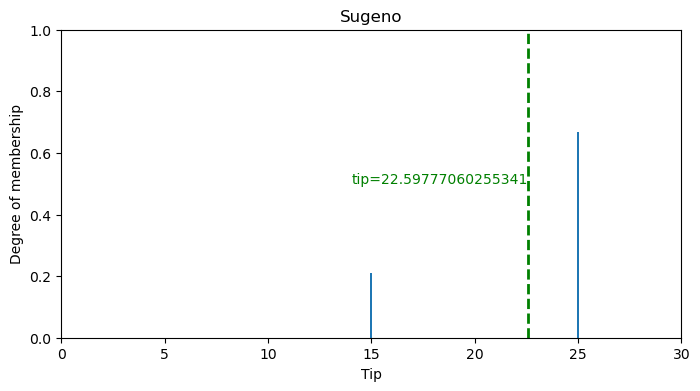

Suggested Tip Amount (Mamdani): 22.033135072761183
Suggested Tip Amount (Sugeno): 22.59777060255341


In [10]:
# Getting input from user
food_quality_input = float(input("Enter food quality (0-10): "))
service_quality_input = float(input("Enter service quality (0-10): "))

# Calculating tip
mamdani_tip = mamdani_inference(food_quality_input, service_quality_input)
sugeno_tip = sugeno_inference(food_quality_input, service_quality_input)

print("Suggested Tip Amount (Mamdani):", mamdani_tip)
print("Suggested Tip Amount (Sugeno):", sugeno_tip)